# Tutorial for exact ECT computation 

*Warning: This is a work in progress. Proceed at your own risk.*

The goal of this section is so show available tools for exact computation of the ECT. 

In [ ]:
from ect import ECT, EmbeddedComplex, create_example_graph

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import networkx as nx

# Note: EmbeddedGraph and EmbeddedCW are now unified into EmbeddedComplex
# For backward compatibility, you can still use:
# from ect import EmbeddedGraph, EmbeddedCW

We can use the `EmbeddedComplex` class (which unifies the old `EmbeddedGraph` and `EmbeddedCW` classes) to find the angle normal to any pair of vertices in the graph, whether or not there is a connecting edge. Setting `angle_labels_circle=True` in the plotting command will try to draw these on the circle. Note that this doesn't tend to do well for large inputs, but can be helpful for small examples.

In [ ]:
# Super simple graph using the unified EmbeddedComplex class
G = EmbeddedComplex()
G.add_node('A', 0,0)
G.add_node('B', 1,0)
G.add_node('C', 2,1)
G.add_node('D', 1,2)
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('D', 'C')

fig, ax = plt.subplots()
G.plot(ax = ax)
G.plot_angle_circle(ax = ax)

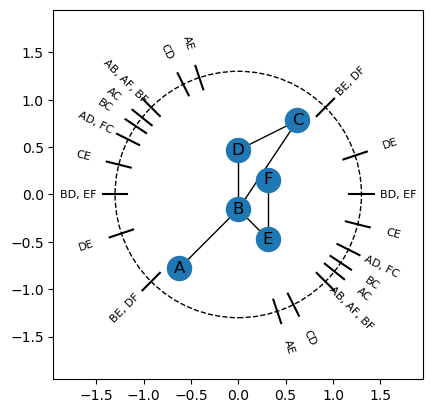

In [3]:
G = create_example_graph(centered=True)
G.rescale_to_unit_disk()


fig, ax = plt.subplots()
G.plot(ax = ax)
G.plot_angle_circle(ax = ax)

We can extract the information directly for use in computation. 

In [ ]:
# If return type is `matrix`, the function returns the matrix of angles and the labels of the angles in the order of the rows/columns in the matrix 
M,Labels = G.get_normal_angle_matrix()  # Updated method name
print(M)

plt.matshow(M)
plt.xticks(range(len(Labels)), Labels)
plt.yticks(range(len(Labels)), Labels)
plt.colorbar()

This can also be returned as a dictionary, with keys given by angles (note the negative angle is not repeated), and value a list of the pairs of vertices associated. Note that in the case of more than one pair of vertices having the same normal angle, it is given as a list of all pairs. 

In [5]:
angles_dict = G.get_normals_dict()
angles_dict

{5.497787143782138: [('A', 'B'), ('A', 'F'), ('B', 'F')],
 5.608444364956034: [('A', 'C')],
 5.81953769817878: [('A', 'D'), ('F', 'C')],
 5.034139534781332: [('A', 'E')],
 5.695182703632018: [('B', 'C')],
 0.0: [('B', 'D'), ('E', 'F')],
 3.9269908169872414: [('B', 'E'), ('D', 'F')],
 2.0344439357957027: [('C', 'D')],
 2.896613990462929: [('C', 'E')],
 3.4633432079864352: [('D', 'E')]}

We can also get it to return the dictionary with rounded values, as well as to have it include all the opposite angles. 

In [6]:
G.get_normals_dict(opposites = True, 
                   num_rounding_digits=2)

{5.5: [('A', 'B'), ('A', 'F'), ('B', 'F')],
 5.61: [('A', 'C')],
 5.82: [('A', 'D'), ('F', 'C')],
 5.03: [('A', 'E')],
 5.7: [('B', 'C')],
 0.0: [('B', 'D'), ('E', 'F')],
 3.93: [('B', 'E'), ('D', 'F')],
 2.03: [('C', 'D')],
 2.9: [('C', 'E')],
 3.46: [('D', 'E')],
 2.36: [('A', 'B'), ('A', 'F'), ('B', 'F')],
 2.47: [('A', 'C')],
 2.68: [('A', 'D'), ('F', 'C')],
 1.89: [('A', 'E')],
 2.56: [('B', 'C')],
 3.14: [('B', 'D'), ('E', 'F')],
 0.79: [('B', 'E'), ('D', 'F')],
 5.17: [('C', 'D')],
 6.04: [('C', 'E')],
 0.32: [('D', 'E')]}